In [1]:
#Import pandas,json and numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set(style="whitegrid", color_codes=True)

In [2]:
# read the credit_card_default file and get the data in a pandas dataframe
df = pd.read_csv("credit_card_default.csv")
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [3]:
# create a dataframe needed for inferential statistics
new_df = df.filter(['ID','LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE_RANGE','MISSED_PYMTS','BALANCE_TO_LIMIT','default payment next month'], axis=1)
new_df.head(10)
male_default = new_df['default payment next month'][new_df.SEX == 1]
female_default = new_df['default payment next month'][new_df.SEX == 2]
# sample sizes
n_male = len(male_default)
n_female = len(female_default)
#Sample means
M_male = np.mean(male_default)
M_female = np.mean(female_default)
#Print sample size and mean
print('Female sample size: ',n_female, '\nFemale sample mean: ', M_female)
print('\nMale sample size: ',n_female, '\nMale sample mean: ', M_male)

Female sample size:  18112 
Female sample mean:  0.20776280918727916

Male sample size:  18112 
Male sample mean:  0.2416722745625841


Null Hypothesis: There is no significant difference between female and male default rate.

H0:μfemales−μmales=0 Significance Level: 95% Confidence

α=0.05

In [4]:
# Conduct a two sample t test
t = stats.ttest_ind(male_default,female_default)[0]
p = stats.ttest_ind(male_default,female_default)[1]

print('t-statistic:', t)
print('p-value:', p)

t-statistic: 6.92667700616
p-value: 4.39524880327e-12


With a very low p value, we will reject the null hypothesis.
Hence there is significant difference between male and female default rates

Is there any relationship between credit limit level and default?

In [5]:
# Find sample size
n =  len(df['default payment next month'])
# Sample mean
M = np.mean(df['default payment next month'])
# Sample standard deviation
s = np.std(df['default payment next month'])
# Print
print('Sample size: ', n, '\nSample Mean: ', M, '\nSample standard deviation: ', s)

Sample size:  30000 
Sample Mean:  0.2212 
Sample standard deviation:  0.41505488793655715


In [6]:
def pearson_r(x,y):
    ''' Compute pearson correlation coefficient between the two arrays'''
    # Compute correlation matrix
    correlation_matrix = np.corrcoef(x,y)
    # Return entry [0,1]
    return correlation_matrix[0,1]

In [7]:
# Seed the random number generator
np.random.seed(42)

# Compute and save empirical correlation
r = pearson_r(new_df['LIMIT_BAL'], df['default payment next month'])

permutation_replicates = np.empty(10000)

#Draw replicates
for i in range(len(permutation_replicates)):
    #limit_permuted = np.random.permutation(df['LIMIT_BAL'])
    # Compute pearson correlation
    limit_permuted = np.random.choice(df.index, size=len(df), replace=True) 
    permutation_replicates[i] = pearson_r(limit_permuted, df['default payment next month'])
    
# Calculate p value
p = np.sum(permutation_replicates <= r)/len(permutation_replicates)
# Print the results:
print('Correlation:', r)
print('p-value =', p)

Correlation: -0.153519876394
p-value = 0.0


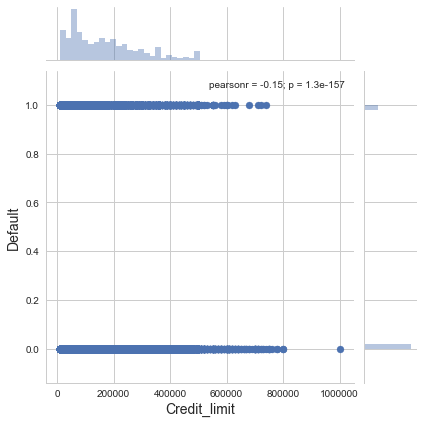

In [8]:
# Create a figure of joint plot of Credit limit and default 
fig = sns.jointplot(new_df['LIMIT_BAL'], df['default payment next month'])
# Add room around the margins
plt.margins(0.125)
# Label axes and add title
fig.set_axis_labels('Credit_limit', 'Default', fontsize = 14)
plt.show()

With p value being zero we can conclude that credit limit and default are independent of each other. But. there is little bit of negative correlation between the two. In other words, higher the credit limit, lower is the chance of default.

What is the relationship between population mean and the mean for each educational level

In [9]:
# What are the default rates at different educational levels
graduate_default = new_df['default payment next month'][new_df.EDUCATION == 1]
university_default = new_df['default payment next month'][new_df.EDUCATION == 2]
high_school_default = new_df['default payment next month'][new_df.EDUCATION == 3]
others_default = new_df['default payment next month'][new_df.EDUCATION == 4]

# sample sizes
n_graduate = len(graduate_default)
n_university = len(university_default)
n_high_school = len(high_school_default)
n_others = len(others_default)
#Sample means
M_graduate = np.mean(graduate_default)
M_university = np.mean(university_default)
M_high_school = np.mean(high_school_default)
M_others = np.mean(others_default)

#Print sample size and mean
print('Gaduate sample size: ',n_graduate, '\nGraduate sample mean: ', M_graduate)
print('\nUniversity sample size: ',n_university, '\nUniversity sample mean: ', M_university)
print('\nHigh School sample size: ',n_high_school, '\nHighSchool sample mean: ', M_high_school)
print('\nOthers sample size: ',n_others, '\nOthers sample mean: ', M_others)

# Let's consider the entire dataset is the population
population_default = new_df['default payment next month']
n =  len(new_df['default payment next month'])
# Sample mean
M = np.mean(new_df['default payment next month'])

#Print population size and mean
print('\nPopulation size: ',n, '\nPopulation mean: ', M)

Gaduate sample size:  10585 
Graduate sample mean:  0.19234766178554558

University sample size:  14030 
University sample mean:  0.23734853884533144

High School sample size:  4917 
HighSchool sample mean:  0.2515761643278422

Others sample size:  123 
Others sample mean:  0.056910569105691054

Population size:  30000 
Population mean:  0.2212


Null Hypothesis: There is no significant difference between Graduate and Unversity default rate.

H0:μgraduate−μuniversity=0 Significance Level: 95% Confidence

α=0.05

In [10]:
# Conduct a two sample t test
t = stats.ttest_ind(graduate_default,university_default)[0]
p = stats.ttest_ind(graduate_default,university_default)[1]

print('t-statistic:', t)
print('p-value:', p)

t-statistic: -8.47776293849
p-value: 2.4225777059e-17


With low p value, the null hypothesis is rejected. 
There is significant difference between graduate default rate and University default rate

Null Hypothesis: There is no significant difference between Graduate and over dataset default rate.

H0:μgraduate−μdataset=0 Significance Level: 95% Confidence

α=0.05

In [11]:
# Conduct a two sample t test
t = stats.ttest_ind(graduate_default,population_default)[0]
p = stats.ttest_ind(graduate_default,population_default)[1]

print('t-statistic:', t)
print('p-value:', p)

t-statistic: -6.22906999663
p-value: 4.73805190377e-10


With low p value, the null hypothesis is rejected. 
There is significant difference between graduate default rate and the overall dataset default rate

Null Hypothesis: There is no significant difference between Unversity and high school default rate.

H0:μuniversity−μhigh_school=0 Significance Level: 95% Confidence

α=0.05

In [12]:
# Conduct a two sample t test
t = stats.ttest_ind(university_default,high_school_default)[0]
p = stats.ttest_ind(university_default,high_school_default)[1]

print('t-statistic:', t)
print('p-value:', p)

t-statistic: -2.00728896952
p-value: 0.0447330796615


While we can reject the null hypothesis at 95% confidence level; we will have to accept the null hypothesis at 99% confidence level.
So, our conclusion is this case is: the default rates of university educated and high school educated people are almost similar.

Null Hypothesis: There is no significant difference between University and over dataset default rate.

H0:μgraduate−μdataset=0 Significance Level: 95% Confidence

α=0.05

In [13]:
# Conduct a two sample t test
t = stats.ttest_ind(university_default,population_default)[0]
p = stats.ttest_ind(university_default,population_default)[1]

print('t-statistic:', t)
print('p-value:', p)

t-statistic: 3.77354149209
p-value: 0.000161157287598


With low p value, the null hypothesis is rejected. 
There is significant difference between University default rate and the overall dataset default rate

Null Hypothesis: There is no significant difference between high school and over dataset default rate.

H0:μgraduate−μdataset=0 Significance Level: 95% Confidence

α=0.05

In [14]:
# Conduct a two sample t test
t = stats.ttest_ind(high_school_default,population_default)[0]
p = stats.ttest_ind(high_school_default,population_default)[1]

print('t-statistic:', t)
print('p-value:', p)

t-statistic: 4.7258829012
p-value: 2.30009406977e-06


With low p value, the null hypothesis is rejected. 
There is significant difference between high school default rate and the overall dataset default rate

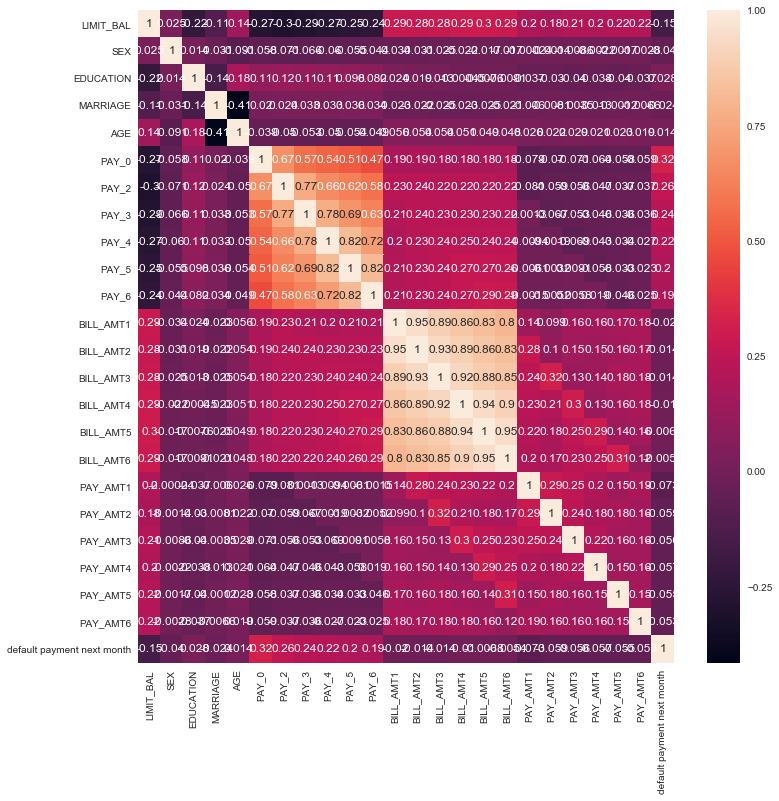

In [15]:
# What are the correlations between all columns?
plt.figure(figsize=(12,12))
del df['ID']
sns.heatmap(df.corr(), annot =True)
plt.show()

We can see that delayed payments (pay_6to pay_0) have the highest correlation with default.